## Identify Fraud From Enron Emails and Financial data
### By Vivek Pandey

### Enron Fraud detection Project Overview
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives.

In this project,I will use Machine learning algoritham to identify Person of interests (POIs) which were involved in fraud activity happened in Enron company.

### INTRODUCTION:
#### Background of Enron Dataset:
This dataset contains Enron emails sent and received by Enron executives during 2000-2002 and this dataset has email metadata such as no of emails received and no of emails sent, moreover this dataset contains financial information such as Salary, Bonus and stock options.

As Fortune named Enron "America's Most Innovative Company" for six consecutive years ,however after that Enron was declared bankrupt due to willful corporate fraud and corruption, which alarmed every company to take fraud very seriously and try to take some serious action to prevent such malicious activities within organization.

So the goal of this project to build a predictive model to identify POIs with he help of Machine learning algorithms and using Enron dataset. 
Since this dataset also has actual POIs and using these actual values we will evaluate our predictive model.


The features in the data fall into three major types, namely financial features, email features and POI labels.

financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

POI label: [‘poi’] (boolean, represented as integer)

In [6]:

import pandas as pd
import numpy as np

import sys
import pickle
sys.path.append("C:/Users/Vvek/ud120-projects-master/ud120-projects-master/tools/")


from feature_format import featureFormat, targetFeatureSplit
##from tester_plus import dump_classifier_and_data

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit

Enron_dictionary = pickle.load( open("C:/Users/Vivek/ud120-projects-master/ud120-projects-master/final_project/final_project_dataset.pkl", "r") )


### Data exploration :

In [7]:
# Convert Data dictionary to pandas dataframe for easy data manipulation
enron_DF = pd.DataFrame.from_dict(Enron_dictionary, orient = 'index')

In [8]:
# Print first few records to check for data and formats
enron_DF.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,...,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,...,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,...,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,...,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,...,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


In [9]:
# No of Rows and Columns
print enron_DF.shape


(146, 21)


Dataset has data for 146 people and there are 20 features,since "poi" column  is our label which tells us whether person is POI hence you are excluding this coulmn in our prediction model.

In [10]:

print "There are total {} people in the dataset." .format(enron_DF.shape[0]) 
print "Out of them there are {} POIs and {} Non POIs." .format(enron_DF[enron_DF.poi==True].shape[0] , enron_DF[enron_DF.poi==False].shape[0]) 


There are total 146 people in the dataset.
Out of them there are 18 POIs and 128 Non POIs.


In [11]:
#quick overview of the data in the dataset
enron_DF.info()
enron_DF.describe().transpose()


<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       146 non-null object
to_messages                  146 non-null object
deferral_payments            146 non-null object
total_payments               146 non-null object
exercised_stock_options      146 non-null object
bonus                        146 non-null object
restricted_stock             146 non-null object
shared_receipt_with_poi      146 non-null object
restricted_stock_deferred    146 non-null object
total_stock_value            146 non-null object
expenses                     146 non-null object
loan_advances                146 non-null object
from_messages                146 non-null object
other                        146 non-null object
from_this_person_to_poi      146 non-null object
poi                          146 non-null bool
director_fees                146 non-null object
deferred_income              146 non-null object


,count,unique,top,freq
salary,146,95,NaN,51
to_messages,146,87,NaN,60
deferral_payments,146,40,NaN,107
total_payments,146,126,NaN,21
exercised_stock_options,146,102,NaN,44
bonus,146,42,NaN,64
restricted_stock,146,98,NaN,36
shared_receipt_with_poi,146,84,NaN,60
restricted_stock_deferred,146,19,NaN,128
total_stock_value,146,125,NaN,20


In the above summary table of missing values frequency, there are many features which has more than 50 % NaN values, so I will try not to consider such features which has many missing values.

### Outlier investigation :

In the process of outlier investigation I have identified below three outliers which needs to remove before futher analysis.

1- TOTAL: This is a summary of all enron's executives financial data.

2- THE TRAVEL AGENCY IN THE PARK : This is a company which was co-owned by the sister of Enron's former Chairman, and here we are investigating Enron's executive, hence we should not include it in our dataset.

#### Needs to implement 3- Invalid data points: “LOCKHART EUGENE E” (contains over 95% invalid values). To keep the quality of analysis, these outliers were removed before further analysis.

In [14]:
# Import plotly 
import plotly
from plotly import tools
plotly.tools.set_credentials_file(username='******', api_key='*************')


In [15]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=enron_DF.salary,
    y=enron_DF.bonus,
    mode='markers',
    text=enron_DF.index  
)


data = [trace1]

layout = go.Layout(
    
    xaxis=dict(
        title='Salary',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Bonus',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
    
    #showlegend=True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Enron-Salary Vs Bonus')

In [16]:
enron_DF.loc[['TOTAL']]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229,NaN,32083396,309886585,311764000,97343619,130322299,NaN,-7576788,434509511,...,83925000,NaN,42667589,NaN,False,1398517,-27992891,48521928,NaN,NaN


In [17]:
enron_DF.loc[['THE TRAVEL AGENCY IN THE PARK']]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
THE TRAVEL AGENCY IN THE PARK,NaN,NaN,NaN,362096,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,362096,NaN,False,NaN,NaN,NaN,NaN,NaN


As per the above graph (before outlier removal) between salary and bonus it is clear that there is one label named as 'TOTAL' which seem an outlier as this belongs to summary of all enron's executives financial data.

In [18]:
# Removing outlier
enron_DF.drop(['TOTAL'], inplace= True)
enron_DF.drop(['THE TRAVEL AGENCY IN THE PARK'], inplace= True)

In [19]:
# After outlier removal 

trace1 = go.Scatter(
    x=enron_DF.salary,
    y=enron_DF.bonus,
    mode='markers',
    text=enron_DF.index  
)


data = [trace1]

layout = go.Layout(
    
    xaxis=dict(
        title='Salary',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Bonus',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
    
    #showlegend=True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Enron-Salary Vs Bonus')

Even after outlier removal it seems there are still some outliers however those are top executives like kenneth lay, Jef Skilling and Lavorato John (who received cash bonuses of $8 million to keep them from leaving Enron last fall) and they can have big bonus as their salary is also high.

In [20]:
#import plotly.plotly as py
#import plotly.graph_objs as go

trace1 = go.Scatter(
    x=enron_DF.salary,
    y=enron_DF.total_stock_value,
    mode='markers',
    text=enron_DF.index  
)


data = [trace1]

layout = go.Layout(
    
    xaxis=dict(
        title='Salary',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='total stock value',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
    
    #showlegend=True
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Enron-Salary Vs total stock value')

From the above Salary and Total stock value graph it also stand out few of other names as well like Rice Kenneth D and White JR thomas K who got 22 M and 15 M stock values however these figures are susceptible with respect to their salary.

## Feature Engineering :

In feature engineering in addition to 21 features I have created three new features from existing features that could improve the performance of Enron POI prediction.

- from_poi_ratio: fraction of emails from POIs,which represents the ratio of the messages from POI to this person against all the messages sent to this person

- to_poi_ratio: fraction of emails to POIs,which represents ratio from this person to POI against all messages from this person.

- shared_poi_ratio: the ratio of email receipts shared with a person of interest to all emails addressed to that individual. 


The rational behind these choices is that the absolute no of emails from/to a POIs might be misleading figure because there might be some innocent employees who just sent/received many emails from POIs as part of your daily official work, however
fraction of these emails to total message may help us to identify the TRUE POIs since corporate fraud can not be done alone and it requires a set of people to do that at larger scale.

In [30]:
# Add the new email features to the dataframe
enron_DF['to_poi_ratio'] = enron_DF['from_poi_to_this_person']/enron_DF['to_messages']
enron_DF['from_poi_ratio'] = enron_DF['from_this_person_to_poi'] / enron_DF['from_messages']
enron_DF['shared_poi_ratio'] = enron_DF['shared_receipt_with_poi'] / enron_DF['to_messages']

enron_DF.replace(to_replace='NaN', value=0.0, inplace=True)

## Feature Scaling : 

It is used to standardize the data of all features. As all features had different units and some of the features had very high value which can have undue influence on the classifier hence in order to make data standard/scaled for classifiers I have used preprocessing.scale() function from sklearn to scale all features to a range between 0 and 1.


In [33]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing, cross_validation, svm
from sklearn.metrics import classification_report

x1 = enron_DF.drop(['email_address','poi'], axis=1)
x1 = preprocessing.scale(x1)

## Feature Selection (intelligently select features)

Feature selection is very important aspect because all features does not equally participate in the prediction and that can add noisy data to our prediction model, so it's very important to feed right set of features which can give us better prediction results.

In order to decide the best features to use, I utilized an automated feature selection function, i.e. SelectKBest, which selects the K features that are defined by the amount of variance explained, automatically selected for use in the classifier. 


In [36]:

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x1 = enron_DF.drop(['email_address','poi'], axis=1)
#x1 = preprocessing.scale(x1)
y1=enron_DF['poi']

# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(x1, y1)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
scores1 = -np.log10(test.pvalues_)
print scores1

features = fit.transform(x1)
# summarize selected features
print(features[0:5,:])

print features.shape
print(test.get_support(indices=True))

#2nd way
x1.columns[test.get_support(indices=True)].tolist()

[ 18.576   1.699   0.217   8.874  25.098  21.06    9.347   8.746   0.065
  24.468   6.234   7.243   0.164   4.246   2.427   2.108  11.596  10.072
   5.345   3.211  16.642   9.296]
[ 4.518  0.711  0.192  2.468  5.797  5.013  2.573  2.44   0.097  5.677
  1.864  2.098  0.164  1.385  0.915  0.827  3.066  2.734  1.653  1.123
  4.125  2.562]
[[  2.020e+05   1.730e+06   4.175e+06   1.730e+06   2.961e-02]
 [  0.000e+00   2.578e+05   0.000e+00   2.578e+05   0.000e+00]
 [  4.770e+02   4.046e+06   0.000e+00   5.243e+06   0.000e+00]
 [  2.671e+05   6.681e+06   1.200e+06   1.062e+07   0.000e+00]
 [  2.397e+05   0.000e+00   4.000e+05   6.301e+04   0.000e+00]]
(144L, 5L)
[ 0  4  5  9 20]


['salary',
 'exercised_stock_options',
 'bonus',
 'total_stock_value',
 'from_poi_ratio']

In [21]:
print enron_DF.head()
enron_DF.values

                    salary to_messages deferral_payments total_payments  \
ALLEN PHILLIP K     201955        2902           2869717        4484442   
BADUM JAMES P          NaN         NaN            178980         182466   
BANNANTINE JAMES M     477         566               NaN         916197   
BAXTER JOHN C       267102         NaN           1295738        5634343   
BAY FRANKLIN R      239671         NaN            260455         827696   

                   exercised_stock_options    bonus restricted_stock  \
ALLEN PHILLIP K                    1729541  4175000           126027   
BADUM JAMES P                       257817      NaN              NaN   
BANNANTINE JAMES M                 4046157      NaN          1757552   
BAXTER JOHN C                      6680544  1200000          3942714   
BAY FRANKLIN R                         NaN   400000           145796   

                   shared_receipt_with_poi restricted_stock_deferred  \
ALLEN PHILLIP K                       1407  

array([[201955, 2902, 2869717, ..., 304805, 'phillip.allen@enron.com', 47],
       ['NaN', 'NaN', 178980, ..., 'NaN', 'NaN', 'NaN'],
       [477, 566, 'NaN', ..., 'NaN', 'james.bannantine@enron.com', 39],
       ..., 
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN'],
       [158403, 'NaN', 'NaN', ..., 'NaN', 'scott.yeager@enron.com', 'NaN'],
       ['NaN', 'NaN', 'NaN', ..., 'NaN', 'NaN', 'NaN']], dtype=object)

In [23]:
predictors = ["salary", "to_messages", "deferral_payments", "total_payments", "exercised_stock_options", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

In [26]:
enron_DF.replace(to_replace='NaN', value=0.0, inplace=True)
enron_DF1 = enron_DF.drop(['poi'], axis=1)
print enron_DF1.head()
enron_DF_POI=enron_DF['poi']
#print enron_DF_POI

                      salary  to_messages  deferral_payments  total_payments  \
ALLEN PHILLIP K     201955.0       2902.0          2869717.0       4484442.0   
BADUM JAMES P            0.0          0.0           178980.0        182466.0   
BANNANTINE JAMES M     477.0        566.0                0.0        916197.0   
BAXTER JOHN C       267102.0          0.0          1295738.0       5634343.0   
BAY FRANKLIN R      239671.0          0.0           260455.0        827696.0   

                    exercised_stock_options      bonus  restricted_stock  \
ALLEN PHILLIP K                   1729541.0  4175000.0          126027.0   
BADUM JAMES P                      257817.0        0.0               0.0   
BANNANTINE JAMES M                4046157.0        0.0         1757552.0   
BAXTER JOHN C                     6680544.0  1200000.0         3942714.0   
BAY FRANKLIN R                          0.0   400000.0          145796.0   

                    shared_receipt_with_poi  restricted_stock_

In [27]:
x1 = enron_DF.drop(['poi','email_address','restricted_stock_deferred','deferred_income','deferral_payments'], axis=1)
print x1
y1=enron_DF['poi']

                                salary  to_messages  total_payments  \
ALLEN PHILLIP K               201955.0       2902.0       4484442.0   
BADUM JAMES P                      0.0          0.0        182466.0   
BANNANTINE JAMES M               477.0        566.0        916197.0   
BAXTER JOHN C                 267102.0          0.0       5634343.0   
BAY FRANKLIN R                239671.0          0.0        827696.0   
BAZELIDES PHILIP J             80818.0          0.0        860136.0   
BECK SALLY W                  231330.0       7315.0        969068.0   
BELDEN TIMOTHY N              213999.0       7991.0       5501630.0   
BELFER ROBERT                      0.0          0.0        102500.0   
BERBERIAN DAVID               216582.0          0.0        228474.0   
BERGSIEKER RICHARD P          187922.0        383.0        618850.0   
BHATNAGAR SANJAY                   0.0        523.0      15456290.0   
BIBI PHILIPPE A               213625.0       1607.0       2047593.0   
BLACHM

In [28]:


# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


x1 = enron_DF.drop(['email_address','poi'], axis=1)
#print x1
y1=enron_DF['poi']

# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(x1, y1)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
scores1 = -np.log10(test.pvalues_)
print scores1

features = fit.transform(x1)
# summarize selected features
print(features[0:5,:])

print features.shape
print(test.get_support(indices=True))

#2nd way
x1.columns[test.get_support(indices=True)].tolist()

[ 18.576   1.699   0.217   8.874  25.098  21.06    9.347   8.746   0.065
  24.468   6.234   7.243   0.164   4.246   2.427   2.108  11.596  10.072
   5.345]
[ 4.518  0.711  0.192  2.468  5.797  5.013  2.573  2.44   0.097  5.677
  1.864  2.098  0.164  1.385  0.915  0.827  3.066  2.734  1.653]
[[  2.020e+05   1.730e+06   4.175e+06   1.730e+06  -3.081e+06]
 [  0.000e+00   2.578e+05   0.000e+00   2.578e+05   0.000e+00]
 [  4.770e+02   4.046e+06   0.000e+00   5.243e+06  -5.104e+03]
 [  2.671e+05   6.681e+06   1.200e+06   1.062e+07  -1.386e+06]
 [  2.397e+05   0.000e+00   4.000e+05   6.301e+04  -2.016e+05]]
(144L, 5L)
[ 0  4  5  9 16]


['salary',
 'exercised_stock_options',
 'bonus',
 'total_stock_value',
 'deferred_income']

In [86]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing, cross_validation, svm
from sklearn.metrics import classification_report

X = enron_DF.iloc[:, [0,4,5,9,16]]
X = preprocessing.scale(X)

Y = enron_DF.iloc[:,15]
#enron_DF.columns.get_loc("poi")


In [87]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [88]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

In [89]:
#clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
# max_depth=3, min_samples_leaf=5)

clf_entropy = DecisionTreeClassifier()
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [90]:
y_pred = clf_gini.predict(X_test)
y_pred

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False], dtype=bool)

In [91]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([False, False, False,  True,  True, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

In [92]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(115L, 5L)
(29L, 5L)
(115L,)
(29L,)


In [93]:
print "Accuracy is ", accuracy_score(y_test,y_pred)*100

Accuracy is  89.6551724138


In [94]:
 print("Report : ",
    classification_report(y_test,y_pred))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.92      0.96      0.94        25\n       True       0.67      0.50      0.57         4\n\navg / total       0.89      0.90      0.89        29\n')


In [95]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='weighted')

(0.8877099911582671, 0.89655172413793105, 0.89017676035931603, None)

In [98]:
print "Accuracy is ", accuracy_score(y_test,y_pred_en)*100

Accuracy is  75.8620689655


In [99]:
 print("Report : ",
    classification_report(y_test,y_pred_en))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.88      0.84      0.86        25\n       True       0.20      0.25      0.22         4\n\navg / total       0.78      0.76      0.77        29\n')


In [100]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred_en, average='weighted')

(0.78189655172413797, 0.75862068965517238, 0.76956759715380418, None)

In [101]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
   
# training a linear SVM classifier
from sklearn.svm import SVC # "Support Vector Classifier"
clf_svm_linear = SVC(kernel = 'linear', C = 1)
clf_svm_linear.fit(X_train, y_train)
svm_predictions = clf_svm_linear.predict(X_test)
 
# model accuracy for X_test  
#accuracy_svm = clf_svm_linear.score(y_test, svm_predictions)
#print accuracy_svm
print "Accuracy of SVM is ", accuracy_score(y_test,svm_predictions)*100

Accuracy of SVM is  89.6551724138


In [102]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, svm_predictions, average='weighted')

(0.9076354679802956, 0.89655172413793105, 0.86844502277163327, None)

In [103]:
 print("Report : ",
    classification_report(y_test,svm_predictions))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.89      1.00      0.94        25\n       True       1.00      0.25      0.40         4\n\navg / total       0.91      0.90      0.87        29\n')


In [104]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
#print gnb_predictions   
#print y_test
# accuracy
#accuracy = gnb.score(y_test, gnb_predictions)
#print accuracy
 
print "Accuracy of Naive Bayes is ", accuracy_score(y_test,gnb_predictions)*100    


Accuracy of Naive Bayes is  27.5862068966


In [105]:
 print("Report : ",
    classification_report(y_test,gnb_predictions))

('Report : ', '             precision    recall  f1-score   support\n\n      False       1.00      0.16      0.28        25\n       True       0.16      1.00      0.28         4\n\navg / total       0.88      0.28      0.28        29\n')


In [106]:
from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

# Use the forest's predict method on the test data
rfc_predictions = rfc.predict(X_test)
print rfc_predictions

print "Accuracy of RandomForestRegressor is ", accuracy_score(y_test,rfc_predictions)*100    

[False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False  True False]
Accuracy of RandomForestRegressor is  93.1034482759


In [107]:
 print("Report : ",
    classification_report(y_test,rfc_predictions))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.93      1.00      0.96        25\n       True       1.00      0.50      0.67         4\n\navg / total       0.94      0.93      0.92        29\n')


In [110]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print accuracy
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

0.862068965517


In [111]:
 print("Report : ",
    classification_report(y_test,knn_predictions))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.86      1.00      0.93        25\n       True       0.00      0.00      0.00         4\n\navg / total       0.74      0.86      0.80        29\n')


This is giving very bad f1 score for true cases 

In [167]:

#Bagging #Bagging 
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 10)
bg.fit(X_train,y_train)

# Use the Bagging's predict method on the test data
bg_predictions = bg.predict(X_test)
print bg_predictions

print "Accuracy of BaggingClassifier is ", accuracy_score(y_test,bg_predictions)*100    

[False False False False False False False False False False  True False
 False False False  True False False False False False False False False
 False False False False False]
Accuracy of BaggingClassifier is  93.1034482759


In [178]:
#Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 10, learning_rate = 1)
adb.fit(X_train,y_train)

# Use the Bagging's predict method on the test data
adb_predictions = adb.predict(X_test)
print adb_predictions

print "Accuracy of AdaBoostClassifier is ", accuracy_score(y_test,adb_predictions)*100    

[False False False  True  True False False False  True False  True False
 False False False False False  True False False False False False False
 False False False  True False]
Accuracy of AdaBoostClassifier is  79.3103448276


In [179]:
# Voting Classifier - Multiple Model Ensemble 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [180]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting = 'hard')

In [181]:
evc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('dt', Decisio...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

In [187]:
#evc.score(X_test, y_test)
evc_predictions = evc.predict(X_test)

In [189]:
print "Accuracy of VotingClassifier is ", accuracy_score(y_test,evc_predictions)*100  

Accuracy of VotingClassifier is  86.2068965517


In [112]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [115]:
knn = KNeighborsClassifier(n_neighbors=5)

In [116]:
# instantiate the grid# instan 
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [117]:
# fit the grid with data
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [118]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.782609,0.108050,{u'n_neighbors': 1}
1,0.869565,0.065615,{u'n_neighbors': 2}
2,0.843478,0.082260,{u'n_neighbors': 3}
3,0.869565,0.038375,{u'n_neighbors': 4}
4,0.869565,0.038375,{u'n_neighbors': 5}
5,0.878261,0.035971,{u'n_neighbors': 6}
6,0.878261,0.035971,{u'n_neighbors': 7}
7,0.878261,0.035971,{u'n_neighbors': 8}
8,0.878261,0.035971,{u'n_neighbors': 9}
9,0.878261,0.035971,{u'n_neighbors': 10}


In [119]:
# examine the first result
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.782608695652


In [120]:

# print the array of mean scores only# print  
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[ 0.783  0.87   0.843  0.87   0.87   0.878  0.878  0.878  0.878  0.878
  0.878  0.878  0.878  0.878  0.878  0.878  0.878  0.878  0.878  0.878
  0.878  0.878  0.878  0.878  0.878  0.878  0.878  0.878  0.878  0.878]


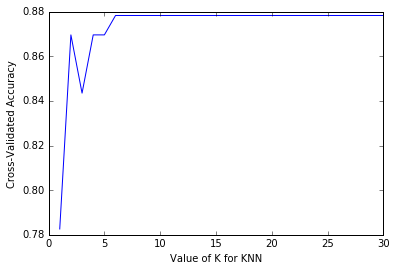

In [121]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [122]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.878260869565
{'n_neighbors': 6}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')


### Testing KNN for best model parameters

In [123]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform').fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print accuracy
 
# creating a confusion matrix
knn_predictions1 = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions1)

0.862068965517


In [124]:
 print("Report : ",
    classification_report(y_test,knn_predictions1))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.86      1.00      0.93        25\n       True       0.00      0.00      0.00         4\n\navg / total       0.74      0.86      0.80        29\n')


##### Even after using best model parameter this model is predicting so poorly in True cases

In [125]:
from sklearn import svm
svm_clf = svm.SVC()
svm_param = {'kernel':('linear', 'rbf', 'sigmoid'),
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'C': [0.1, 1, 10, 100, 1000]}
svm_grid_search = GridSearchCV(estimator = svm_clf, param_grid = svm_param)

# instantiate the grid# instan 
grid_SVM = GridSearchCV(svm_clf, svm_param, cv=10, scoring='accuracy', return_train_score=False)

# fit the grid with data
grid_SVM.fit(X_train,y_train)


# print the array of mean scores only# print  
grid_svm_mean_scores = grid_SVM.cv_results_['mean_test_score']
#print(grid_mean_scores)

In [127]:
# examine the best model# examin 
print(grid_SVM.best_score_)
print(grid_SVM.best_params_)

0.886956521739
{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}


#### Testing SVM for optimized parameters

In [128]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
   
# training a linear SVM classifier
from sklearn.svm import SVC # "Support Vector Classifier"
clf_svm_linear = SVC(kernel = 'rbf', C = 10,gamma=0.01)
clf_svm_linear.fit(X_train, y_train)
svm_predictions = clf_svm_linear.predict(X_test)
 
# model accuracy for X_test  
#accuracy_svm = clf_svm_linear.score(y_test, svm_predictions)
#print accuracy_svm
print "Accuracy of SVM is ", accuracy_score(y_test,svm_predictions)*100

Accuracy of SVM is  86.2068965517


In [129]:
 print("Report : ",
    classification_report(y_test,knn_predictions1))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.86      1.00      0.93        25\n       True       0.00      0.00      0.00         4\n\navg / total       0.74      0.86      0.80        29\n')


#### Very poor results for true prediction cases

In [130]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_param = {'criterion':('gini', 'entropy'),
'splitter':('best','random')}
dt_grid_search = GridSearchCV(estimator = dt_clf, param_grid = dt_param)

# fit the grid with data
dt_grid_search.fit(X_train,y_train)


# print the array of mean scores only# print  
grid_dt_mean_scores = dt_grid_search.cv_results_['mean_test_score']
#print(grid_mean_scores)

In [131]:
# examine the best model# examin 
print(dt_grid_search.best_score_)
print(dt_grid_search.best_params_)

0.834782608696
{'splitter': 'best', 'criterion': 'gini'}


In [132]:
dt_clf1 = tree.DecisionTreeClassifier()
dt_clf1.fit(X_train, y_train)
dt_predict=dt_clf1.predict(X_test)


In [133]:
 print("Report : ",
    classification_report(y_test,dt_predict))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.91      0.84      0.87        25\n       True       0.33      0.50      0.40         4\n\navg / total       0.83      0.79      0.81        29\n')


## Feature Engineering

In [137]:
# Add the new email features to the dataframe
enron_DF['to_poi_ratio'] = enron_DF['from_poi_to_this_person']/enron_DF['to_messages']
enron_DF['from_poi_ratio'] = enron_DF['from_this_person_to_poi'] / enron_DF['from_messages']
enron_DF['shared_poi_ratio'] = enron_DF['shared_receipt_with_poi'] / enron_DF['to_messages']

enron_DF.replace(to_replace='NaN', value=0.0, inplace=True)

In [138]:
print enron_DF.head()

                      salary  to_messages  deferral_payments  total_payments  \
ALLEN PHILLIP K     201955.0       2902.0          2869717.0       4484442.0   
BADUM JAMES P            0.0          0.0           178980.0        182466.0   
BANNANTINE JAMES M     477.0        566.0                0.0        916197.0   
BAXTER JOHN C       267102.0          0.0          1295738.0       5634343.0   
BAY FRANKLIN R      239671.0          0.0           260455.0        827696.0   

                    exercised_stock_options      bonus  restricted_stock  \
ALLEN PHILLIP K                   1729541.0  4175000.0          126027.0   
BADUM JAMES P                      257817.0        0.0               0.0   
BANNANTINE JAMES M                4046157.0        0.0         1757552.0   
BAXTER JOHN C                     6680544.0  1200000.0         3942714.0   
BAY FRANKLIN R                          0.0   400000.0          145796.0   

                    shared_receipt_with_poi  restricted_stock_

In [139]:

# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


x1 = enron_DF.drop(['email_address','poi'], axis=1)
#print x1
y1=enron_DF['poi']

# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(x1, y1)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
scores1 = -np.log10(test.pvalues_)
print scores1

features = fit.transform(x1)
# summarize selected features
print(features[0:5,:])

print features.shape
print(test.get_support(indices=True))

#2nd way
x1.columns[test.get_support(indices=True)].tolist()

[ 18.576   1.699   0.217   8.874  25.098  21.06    9.347   8.746   0.065
  24.468   6.234   7.243   0.164   4.246   2.427   2.108  11.596  10.072
   5.345   3.211  16.642   9.296]
[ 4.518  0.711  0.192  2.468  5.797  5.013  2.573  2.44   0.097  5.677
  1.864  2.098  0.164  1.385  0.915  0.827  3.066  2.734  1.653  1.123
  4.125  2.562]
[[  2.020e+05   1.730e+06   4.175e+06   1.730e+06   2.961e-02]
 [  0.000e+00   2.578e+05   0.000e+00   2.578e+05   0.000e+00]
 [  4.770e+02   4.046e+06   0.000e+00   5.243e+06   0.000e+00]
 [  2.671e+05   6.681e+06   1.200e+06   1.062e+07   0.000e+00]
 [  2.397e+05   0.000e+00   4.000e+05   6.301e+04   0.000e+00]]
(144L, 5L)
[ 0  4  5  9 20]


['salary',
 'exercised_stock_options',
 'bonus',
 'total_stock_value',
 'from_poi_ratio']

In [140]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing, cross_validation, svm

X = enron_DF.iloc[:, [0,4,5,9,20]]
X = preprocessing.scale(X)

Y = enron_DF.iloc[:,15]
#enron_DF.columns.get_loc("poi")


In [141]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)

In [142]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svm_clf = svm.SVC()
svm_param = {'kernel':('linear', 'rbf', 'sigmoid'),
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'C': [0.1, 1, 10, 100, 1000]}
svm_grid_search = GridSearchCV(estimator = svm_clf, param_grid = svm_param)

# instantiate the grid# instan 
grid_SVM = GridSearchCV(svm_clf, svm_param, cv=10, scoring='accuracy')

# fit the grid with data
grid_SVM.fit(X_train,y_train)

Y_pred_svm=grid_SVM.predict(X_test)
# print the array of mean scores only# print  
grid_svm_mean_scores = grid_SVM.cv_results_['mean_test_score']
#print(grid_mean_scores)

In [143]:
# examine the best model# examin 
print(grid_SVM.best_score_)
print(grid_SVM.best_params_)

0.886956521739
{'kernel': 'rbf', 'C': 1000, 'gamma': 0.001}


In [62]:
from sklearn.metrics import precision_recall_fscore_support
print precision_recall_fscore_support(y_test, Y_pred_svm, average='weighted')

(0.74316290130796658, 0.86206896551724133, 0.79821200510855683, None)


C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



In [144]:
# importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


print("Report : ",
    classification_report(y_test,Y_pred_svm))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.86      1.00      0.93        25\n       True       0.00      0.00      0.00         4\n\navg / total       0.74      0.86      0.80        29\n')


In [145]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print 'F1 score:', f1_score(y_test, Y_pred_svm,
                            average='weighted')

F1 score: 0.798212005109


In [146]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_param = {'criterion':('gini', 'entropy'),
'splitter':('best','random')}
dt_grid_search = GridSearchCV(estimator = dt_clf, param_grid = dt_param)

# fit the grid with data
dt_grid_search.fit(X_train,y_train)


# print the array of mean scores only# print  
grid_dt_mean_scores = dt_grid_search.cv_results_['mean_test_score']
#print(grid_mean_scores)

# examine the best model# examin 
print(dt_grid_search.best_score_)
print(dt_grid_search.best_params_)

0.817391304348
{'splitter': 'random', 'criterion': 'entropy'}


In [147]:
dt_clf2 = tree.DecisionTreeClassifier(splitter='random',criterion='entropy')
dt_clf2.fit(X_train, y_train)
dt_predict1=dt_clf2.predict(X_test)

In [148]:
print("Report : ",
    classification_report(y_test,dt_predict1))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.96      0.92      0.94        25\n       True       0.60      0.75      0.67         4\n\navg / total       0.91      0.90      0.90        29\n')


In [149]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline


# define the parameter values that should be searched
k_range = list(range(1, 31))
#print(k_range)

knn = KNeighborsClassifier(n_neighbors=5)

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
#print(param_grid)

# instantiate the grid# instan 
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

# fit the grid with data
grid.fit(X_train,y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.886956521739
{'n_neighbors': 9}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')


In [150]:
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform').fit(X_train, y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print accuracy
 
# creating a confusion matrix
knn_predictions1 = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions1)

0.862068965517


In [151]:
print("Report : ",
    classification_report(y_test,knn_predictions1))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.86      1.00      0.93        25\n       True       0.00      0.00      0.00         4\n\navg / total       0.74      0.86      0.80        29\n')


In [152]:
from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

# Use the forest's predict method on the test data
rfc_predictions = rfc.predict(X_test)
print rfc_predictions

print "Accuracy of RandomForestRegressor is ", accuracy_score(y_test,rfc_predictions)*100    

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]
Accuracy of RandomForestRegressor is  86.2068965517


In [153]:
print("Report : ",
    classification_report(y_test,rfc_predictions))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.86      1.00      0.93        25\n       True       0.00      0.00      0.00         4\n\navg / total       0.74      0.86      0.80        29\n')


In [154]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
 
#print gnb_predictions   
#print y_test
# accuracy
#accuracy = gnb.score(y_test, gnb_predictions)
#print accuracy
 
print "Accuracy of Naive Bayes is ", accuracy_score(y_test,gnb_predictions)*100    


Accuracy of Naive Bayes is  86.2068965517


In [155]:
print("Report : ",
    classification_report(y_test,gnb_predictions))

('Report : ', '             precision    recall  f1-score   support\n\n      False       0.89      0.96      0.92        25\n       True       0.50      0.25      0.33         4\n\navg / total       0.84      0.86      0.84        29\n')


In [158]:
import os
os.getcwd()

'C:\\Users\\Vivek\\ud120-projects-master\\ud120-projects-master\\tools'

## References:
https://www.nytimes.com/2002/06/18/business/officials-got-a-windfall-before-enron-s-collapse.html

https://www.risk.net/risk-management/2123422/ten-years-after-its-collapse-enron-lives-energy-markets